In [1]:
import pandas as pd
import pickle as pkl
import re
from sklearn.model_selection import train_test_split

# 모델 구축

In [2]:
from konlpy.tag import Okt

okt = Okt()

In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

# 1. 데이터 준비

In [4]:
rating_data = pd.read_csv('./dataformodeling/kr3.tsv', encoding='utf8', sep='\t', engine='python')
rating_data.head()

,Rating,Review
0,1,숙성 돼지고기 전문점입니다. 건물 모양 때문에 매장 모양도 좀 특이하지만 쾌적한 편...
1,1,고기가 정말 맛있었어요! 육즙이 가득 있어서 너무 좋았아요 일하시는 분들 너무 친절...
2,1,"잡내 없고 깔끔, 담백한 맛의 순댓국이 순댓국을 안 좋아하는 사람들에게도 술술 넘어..."
3,1,고기 양이 푸짐해서 특 순대국밥을 시킨 기분이 듭니다 맛도 좋습니다 다만 양념장이 ...
4,1,순댓국 자체는 제가 먹어본 순대국밥집 중에서 Top5 안에는 들어요. 그러나 밥 양...


In [5]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641762 entries, 0 to 641761
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Rating  641762 non-null  int64 
 1   Review  641762 non-null  object
dtypes: int64(1), object(1)
memory usage: 9.8+ MB


In [6]:
rating_data.Rating.value_counts()

1    388111
2    182741
0     70910
Name: Rating, dtype: int64

In [7]:
rating_df = pd.DataFrame()

rating_df = rating_df.append(rating_data[rating_data['Rating'] == 1])
rating_df = rating_df.append(rating_data[rating_data['Rating'] == 0])

rating_df.columns = ['label', 'document']

In [8]:
rating_df[rating_df['label']==1].iloc[23]

label                 1
document    또 가고 싶다 맛있어
Name: 31, dtype: object

In [9]:
import re

rating_df['document'] = rating_df['document'].apply(lambda x: re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))
rating_df.head()

,label,document
0,1,숙성 돼지고기 전문점입니다 건물 모양 때문에 매장 모양도 좀 특이하지만 쾌적한 편...
1,1,고기가 정말 맛있었어요 육즙이 가득 있어서 너무 좋았아요 일하시는 분들 너무 친절...
2,1,잡내 없고 깔끔 담백한 맛의 순댓국이 순댓국을 안 좋아하는 사람들에게도 술술 넘어...
3,1,고기 양이 푸짐해서 특 순대국밥을 시킨 기분이 듭니다 맛도 좋습니다 다만 양념장이 ...
4,1,순댓국 자체는 제가 먹어본 순대국밥집 중에서 안에는 들어요 그러나 밥 양이 적...


In [10]:
rating_df.reset_index(drop=True, inplace=True)

In [11]:
rating_df

,label,document
0,1,숙성 돼지고기 전문점입니다 건물 모양 때문에 매장 모양도 좀 특이하지만 쾌적한 편...
1,1,고기가 정말 맛있었어요 육즙이 가득 있어서 너무 좋았아요 일하시는 분들 너무 친절...
2,1,잡내 없고 깔끔 담백한 맛의 순댓국이 순댓국을 안 좋아하는 사람들에게도 술술 넘어...
3,1,고기 양이 푸짐해서 특 순대국밥을 시킨 기분이 듭니다 맛도 좋습니다 다만 양념장이 ...
4,1,순댓국 자체는 제가 먹어본 순대국밥집 중에서 안에는 들어요 그러나 밥 양이 적...
...,...,...
459016,0,평일 런치라 그런지 메뉴가 진짜 없네요 소고기 양도 적구 흑임자 아이스크림과 떡볶...
459017,0,맛은 미원 탄 콘셉트가 없는 불친절함 우리한테만 그러나 하고 여러 팀 봤는데 불친...
459018,0,꽤 자주 가는 편이고 맛은 정말 인정하지만 기본이 안 되어있는 곳 같음 영업시간은...
459019,0,배달 시켜 먹었고요 거리상 입니다 배민에서 시켰고 정확히 만에 배달이 왔...


In [55]:
idx = np.random.choice(459021, 459021, replace = False)

#idx_tr = idx[:321315]
#idx_te = idx[321315:]
idx_tr = idx[:150000]
idx_te = idx[150000:210000]

In [56]:
rating_tr = rating_df.iloc[idx_tr]
rating_te = rating_df.iloc[idx_te]

rating_tr.label.value_counts()

1    126977
0     23023
Name: label, dtype: int64

In [57]:
rating_tr[rating_tr['label']==0]

,label,document
410649,0,포장했는데 양도 작고 냄비 가져갔는데도 양이 정해져 있다며 불친절함 건더기가 너무 ...
422278,0,음식 남겨 보기 처음입니다 주차 열악 더운데 길 건너 걸어와야 하고 젓가락 놓기...
438665,0,망고 빙수의 지존이라 생각해서 만빙 시즌엔 자주 가는데 이번에 다녀와서 크게 실망했...
445729,0,체육반 제육인 줄 알았는데 수육이다 부드럽고 평범한 수육 똑같은 수육 냄새 안 나고...
425990,0,그냥 고사리 넣은 되직한 육개장이에요 한번 경험으로 만족입니다
...,...,...
444446,0,지난달쯤에 갔던 거 같은데 정말 친절하시므로 동네 주민들이라면 커피 한잔하러 가기...
445580,0,따로국밥
401318,0,별 하나도 아깝다 절대 가지 마세요 돈 아까워
417127,0,오픈 전부터 상당히 기대했는데 솔직히 기대 이하였습니다 서비스 품질 다 제하고...


# 2. 피쳐 벡터화: TF-IDF

In [58]:
from konlpy.tag import Okt

okt = Okt()

In [59]:
def okt_tokenizer(text):
    tokens = okt.morphs(text)
    return tokens

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, ngram_range=(1, 2), min_df=3, max_df=0.9)
tfidf.fit(rating_tr['document'])
rating_tr_tfidf = tfidf.transform(rating_tr['document'])

In [ ]:
from sklearn.linear_model import LogisticRegression

SA_lr = LogisticRegression(random_state = 0)

In [ ]:
SA_lr.fit(rating_tr_tfidf, rating_tr['label'])

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'C': [1, 3, 3.5, 4, 4.5, 5]}
SA_lr_grid_cv = GridSearchCV(SA_lr, param_grid=params, cv=3, scoring='accuracy', verbose=1)

In [ ]:
SA_lr_grid_cv.fit(rating_tr_tfidf, rating_tr['label'])

In [ ]:
print(SA_lr_grid_cv.best_params_, round(SA_lr_grid_cv.best_score_, 4))

In [ ]:
SA_lr_best = SA_lr_grid_cv.best_estimator_

# 4. 분석모델 평가

In [ ]:
rating_te_tfidf = tfidf.transform(rating_te['document'])

In [ ]:
test_predict = SA_lr_best.predict(rating_te_tfidf)

In [ ]:
from sklearn.metrics import accuracy_score

print('감성분석 정확도:', round(accuracy_score(rating_te['label'], test_predict), 3))

In [35]:
st = input('감성분석할 문장입력 >> ')

감성분석할 문장입력 >> 별로예요


In [36]:
st = re.compile(r'[ㄱ-ㅣ가-힣]+').findall(st)
print(st)
st = [" ".join(st)]
print(st)

['별로예요']
['별로예요']


In [37]:
st_tfidf = tfidf.transform(st)

st_predict = SA_lr_best.predict(st_tfidf)

In [38]:
if (st_predict == 0):
    print(st, "->> 부정 감정")
else:
    print(st, "->> 긍정 감정")

['별로예요'] ->> 부정 감정


# 배민 리뷰 데이터로 감성분석

In [39]:
with open('../conts_CH.pkl', 'rb') as f:
    data = pkl.load(f)

In [40]:
df = pd.DataFrame(data, columns=['review'])
df

,review
0,너무너무 맛있어요! 새우튀김 잘먹겠습니다~
1,맛있게 잘먹었습니다.너무 배부르고 맛있게 먹었네요
2,맛있습니당
3,감사합니다 맛있게 잘먹었어요 포장이 깔끔 해서 좋아요ㅎ
4,맛있게 잘 먹었습니다
...,...
119,맛있었어용 !
120,맛있어요~~
121,맛있게 잘 먹었습니다 근데 좀 달아요
122,맛있ㅇ어요


In [41]:
df['review'] = df['review'].apply(lambda x: re.sub(r'[^ ㄱ-ㅣ가-힣]+', " ", x))

df.head()

,review
0,너무너무 맛있어요 새우튀김 잘먹겠습니다
1,맛있게 잘먹었습니다 너무 배부르고 맛있게 먹었네요
2,맛있습니당
3,감사합니다 맛있게 잘먹었어요 포장이 깔끔 해서 좋아요ㅎ
4,맛있게 잘 먹었습니다


## 2. 감성 분석 수행

In [42]:
df_tfidf = tfidf.transform(df['review'])

df_predict = SA_lr_best.predict(df_tfidf)

df['label'] = df_predict

In [43]:
df.head()

,review,label
0,너무너무 맛있어요 새우튀김 잘먹겠습니다,1
1,맛있게 잘먹었습니다 너무 배부르고 맛있게 먹었네요,1
2,맛있습니당,1
3,감사합니다 맛있게 잘먹었어요 포장이 깔끔 해서 좋아요ㅎ,1
4,맛있게 잘 먹었습니다,1


In [44]:
print(df['label'].value_counts())

1    120
0      4
Name: label, dtype: int64


In [45]:
columns_name = ['review', 'label']
neg_df = pd.DataFrame(columns=columns_name)
pos_df = pd.DataFrame(columns=columns_name)

for i, data in df.iterrows():
    review = data['review']
    label = data['label']
    
    if label == 0:
        neg_df = neg_df.append(pd.DataFrame([[review, label]], columns=columns_name))
    else:
        pos_df = pos_df.append(pd.DataFrame([[review, label]], columns=columns_name))

In [46]:
len(neg_df), len(pos_df)

(4, 120)

## 3. 감성분석 결과 시각화

In [47]:
POS_description = pos_df['review']

POS_description_noun_tk = []
POS_description_noun_join = []

for d in POS_description:
    POS_description_noun_tk.append(okt.nouns(d)) #형태소가 명사인 것만 추출
for d in POS_description_noun_tk:
    d2 = [w for w in d if len(w) > 1] #길이가 1인 토큰은 제외
    POS_description_noun_join.append(" ".join(d2)) # 토큰을 연결(join)하여 리스트 구성

print(POS_description_noun_join)

['새우 튀김', '', '', '포장', '', '배달 항상 주문', '치즈스틱', '치밥 치킨 주문 가격 부담', '', '', '양도 배달', '떡볶이 반도', '벌써 거의 사진 강츄', '냉동 거나 전날 닭고기 비엔나 전부', '뭔가 갈비 천왕', '', '', '', '로제 추천', '배달 추천', '존맛', '주문 준비 시간 취소 기분 배달 이제 치밥 여기 주문', '', '', '메뉴 주문 겟습', '배달', '조금', '매번 양념 소스 먹기 미니 떡볶이 처음 기대 하나 요즘 아빠 계속 치밥 달라', '살짝 계란찜 간이', '항상', '사장 콜라 서비스', '매번', '닭다리 살이 주문 닭다리 뻑뻑 닭꼬치', '배달', '', '두번째', '주문', '', '아유', '', '오뎅 국물 배달', '진짜 치밥 무조건 여기', '배달', '', '다음 치밥', '양도', '', '포장 존맛', '야채', '치밥 피카츄 돈까스 어랜 가끔 치밥', '정말 간도 양도 담번 번창', '음식 다음 주문', '', '', '어유', '양도 소스 가격 자주', '조금 배달 시간 번창', '안나 양념 정도 의향', '여기', '항상', '혼자 치킨 먹기 부담', '', '오늘 처음 다음', '처음 주문 굿굿', '', '치밥 계란찜', '일단 구성 음식 하나', '정말 지코 스타일 매콤', '매콤', '', '분전', '', '주문', '음식 양도 가격 대비 정말', '치밥 선생 여기 제일 가성', '혼자 먹기', '어제 잘못 뉼렀 용매 매콤 한지 닝닝 양도 번창 코로나', '치밥 다른 진짜', '', '매콤 양은 조금', '사장 진짜 장난 햇반 공기 과식 다음', '', '', '항상', '배달 항상 주문', '반찬 마땅치 제입 아이', '고기 국물 수돗물', '치밥 최고 사람 한번 절대 식사 먹기 최고 치즈 고기 추가 계란찜 얼마나 항상 다음 주문', '사진', '', '아쥬', '', '장난 아주', '진짜 야채', '포장 배송 먹기 쪼꼼 짱짱', '양도 아주

In [48]:
NEG_description = neg_df['review']

NEG_description_noun_tk = []
NEG_description_noun_join = []

for d in NEG_description:
    NEG_description_noun_tk.append(okt.nouns(d)) #형태소가 명사인 것만 추출
for d in NEG_description_noun_tk:
    d2 = [w for w in d if len(w) > 1] #길이가 1인 토큰은 제외
    NEG_description_noun_join.append(" ".join(d2)) # 토큰을 연결(join)하여 리스트 구성

print(NEG_description_noun_join)

['치밥 사람 발전 댓글 계속 인장 개선 의향 내동 개선', '호로 달라 전화 호로', '냄새 배송', '안달']


In [49]:
POS_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df=2 )
POS_dtm = POS_tfidf.fit_transform(POS_description_noun_join)
POS_vocab = dict()

for idx, word in enumerate(POS_tfidf.get_feature_names()):
    POS_vocab[word] = POS_dtm.getcol(idx).sum()

POS_words = sorted(POS_vocab.items(), key=lambda x: x[1], reverse=True)
POS_words

[('주문', 8.10851317978345),
 ('배달', 7.9094901807371),
 ('치밥', 5.594305336508656),
 ('양도', 4.9221265682000634),
 ('항상', 4.63260674313422),
 ('진짜', 3.8111108632950352),
 ('매콤', 3.7098752433701607),
 ('음식', 3.59638571080184),
 ('추천', 3.1614627687029757),
 ('매번', 2.9891776353115844),
 ('다음', 2.9076790513558306),
 ('가격', 2.65763405141507),
 ('여기', 2.646451924968403),
 ('국물', 2.4975420559653774),
 ('포장', 2.424752191681087),
 ('먹기', 2.420966695876591),
 ('처음', 2.4110361597122347),
 ('조금', 2.271174499219941),
 ('계란찜', 2.183677833968312),
 ('번창', 2.084478805413887),
 ('사진', 2.0),
 ('양념', 1.9780042461425875),
 ('정말', 1.9188855789335615),
 ('사장', 1.7993139075424691),
 ('야채', 1.7842286426363545),
 ('아이', 1.773413554729188),
 ('전부', 1.746534015146592),
 ('떡볶이', 1.7351371684844585),
 ('존맛', 1.7290807573084959),
 ('아주', 1.5009255882260408),
 ('콜라', 1.3718650670784909),
 ('혼자', 1.2790383263250238),
 ('장난', 1.263187785496737),
 ('미니', 1.2028525160234544),
 ('가성', 1.152199896530026),
 ('고기', 1.1381392507

In [51]:
NEG_tfidf = TfidfVectorizer(tokenizer = okt_tokenizer, min_df=1 )
NEG_dtm = NEG_tfidf.fit_transform(NEG_description_noun_join)
NEG_vocab = dict()

for idx, word in enumerate(NEG_tfidf.get_feature_names()):
    NEG_vocab[word] = NEG_dtm.getcol(idx).sum()

NEG_words = sorted(NEG_vocab.items(), key=lambda x: x[1], reverse=True)
NEG_words

[('안달', 1.0),
 ('호로', 0.816496580927726),
 ('냄새', 0.7071067811865476),
 ('배송', 0.7071067811865476),
 ('개선', 0.5773502691896257),
 ('달라', 0.408248290463863),
 ('전화', 0.408248290463863),
 ('계속', 0.28867513459481287),
 ('내동', 0.28867513459481287),
 ('댓글', 0.28867513459481287),
 ('발전', 0.28867513459481287),
 ('사람', 0.28867513459481287),
 ('의향', 0.28867513459481287),
 ('인장', 0.28867513459481287),
 ('치밥', 0.28867513459481287)]

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fm.get_fontconfig_fonts()
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

max = 15

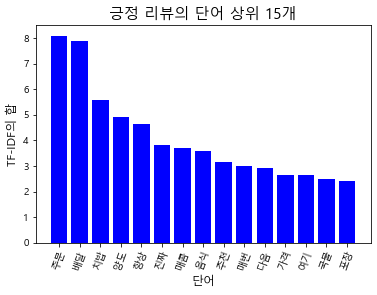

In [53]:
plt.bar(range(max), [i[1] for i in POS_words[:max]], color="blue")
plt.title("긍정 리뷰의 단어 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in POS_words[:max]], rotation=70)

plt.show()

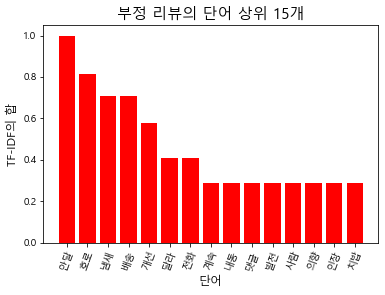

In [54]:
plt.bar(range(max), [i[1] for i in NEG_words[:max]], color="red")
plt.title("부정 리뷰의 단어 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in NEG_words[:max]], rotation=70)

plt.show()

In [2]:
with open('NEG_words.pkl', 'rb') as f:
    NEG_words_half = pkl.load(f)
with open('POS_words.pkl', 'rb') as f:
    POS_words_half = pkl.load(f)

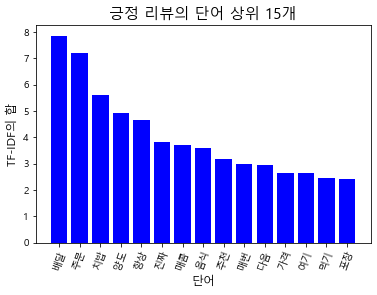

In [5]:
plt.bar(range(max), [i[1] for i in POS_words_half[:max]], color="blue")
plt.title("긍정 리뷰의 단어 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in POS_words_half[:max]], rotation=70)

plt.show()

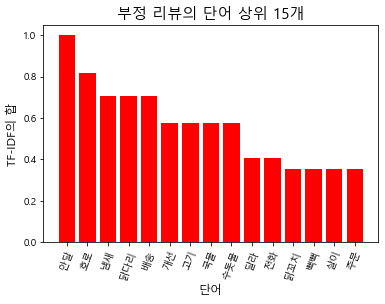

In [6]:
plt.bar(range(max), [i[1] for i in NEG_words_half[:max]], color="red")
plt.title("부정 리뷰의 단어 상위 %d개" %max, fontsize=15)
plt.xlabel("단어", fontsize=12)
plt.ylabel("TF-IDF의 합", fontsize=12)
plt.xticks(range(max), [i[0] for i in NEG_words_half[:max]], rotation=70)

plt.show()